In [74]:
import numpy as np
import matplotlib.pyplot as plt
import os

import sys
sys.path.insert(0,'src')

In [2]:
dir = 'models'
os.listdir(dir)

['wflc_tiny_snr1_500_aug10_last.npz',
 'wflc_tiny_snr2_500_aug10_losses.npy',
 'wflc_small_snr1_200_aug10_best.npz',
 'wflc_small_snr0.5.npz',
 'wflc_small_snr0.1_losses.npy',
 'wflc_small_snr1000_2_aug10_losses.npy',
 'wflc_small_snr0.3_losses.npy',
 'wflc_small_snr5_200_aug10_best.npz',
 'wflc_small_snr2_500_aug10_nofreeze_last.npz',
 'wflc_small_snr0.npz',
 'wflc_tiny_snr1_500_aug10_losses.npy',
 'wflc_small_snr1000_2_aug10_last.npz',
 'wflc_small_snr0.5_200_aug10_losses.npy',
 'wflc_small_snr0.4_lass.npz',
 'wflc_tiny_snr1_500_aug10_best.npz',
 'wflc_tiny_snr2_500_aug10_best.npz',
 'wflc_small_snr0_best.npz',
 'wflc_small_snr0.3_best.npz',
 'wflc_small_snr1_200_aug10_losses.npy',
 'wflc_small_snr0.4_losses.npy',
 'wflc_small_snr0.5_500_aug10_last.npz',
 'wflc_tiny_snr1_500_aug10_nofreeze_last.npz',
 'wflc_small_snr2_200_aug10_losses.npy',
 'wflc_small_snr1000_200_aug10_last.npz',
 'wflc_base_snr2_500_aug10_nofreeze_best.npz',
 'wflc_base_snr2_500_aug10_last.npz',
 'wflc_small_snr0.

wflc_tiny_snr2_500_aug10_losses.npy
wflc_tiny 2


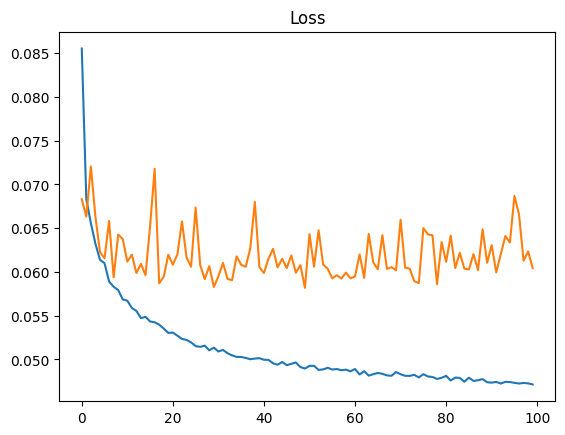

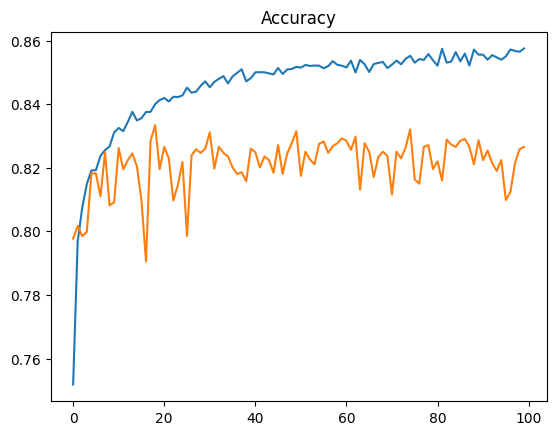

wflc_small_snr0.1_losses.npy
wflc_small 0.1


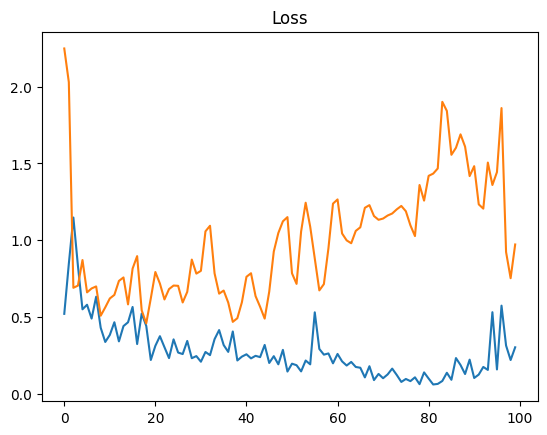

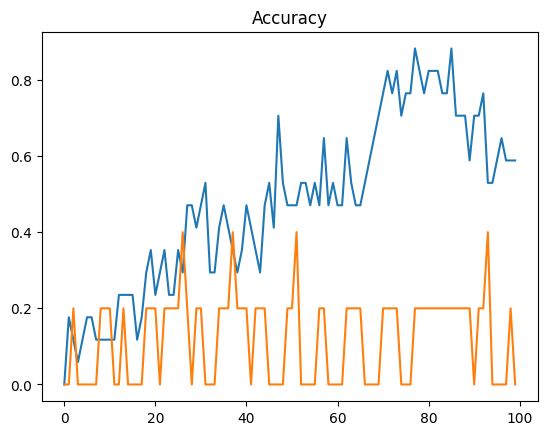

wflc_small_snr1000_2_aug10_losses.npy
wflc_small 1000


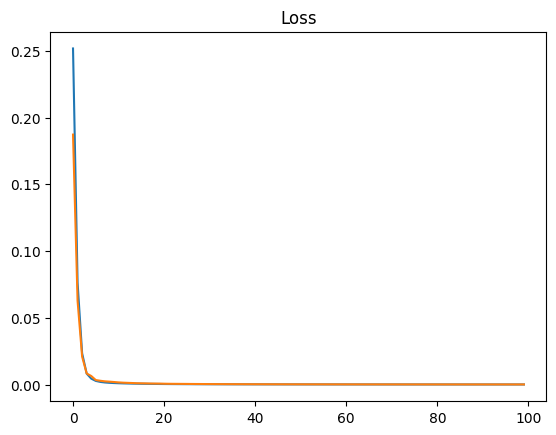

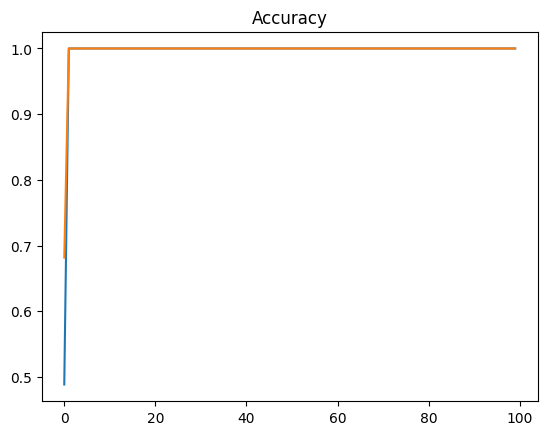

wflc_small_snr0.3_losses.npy
wflc_small 0.3


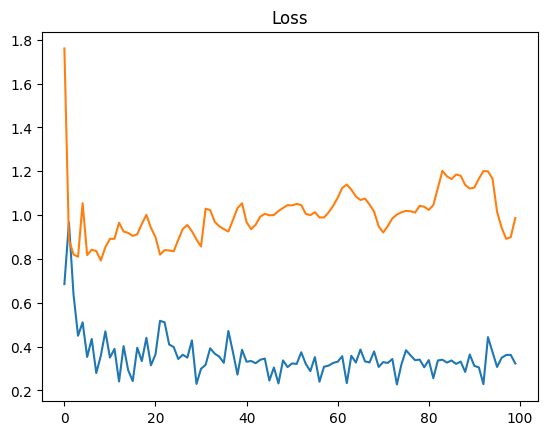

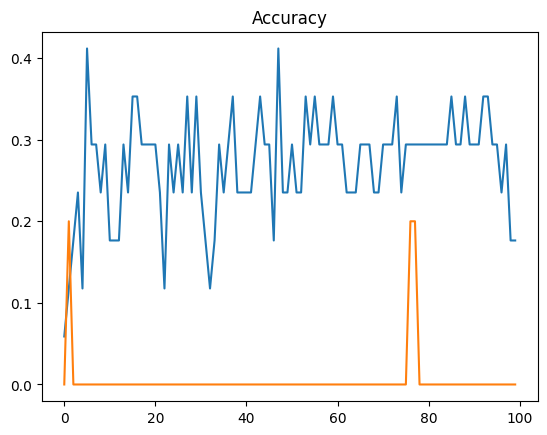

wflc_tiny_snr1_500_aug10_losses.npy
wflc_tiny 1


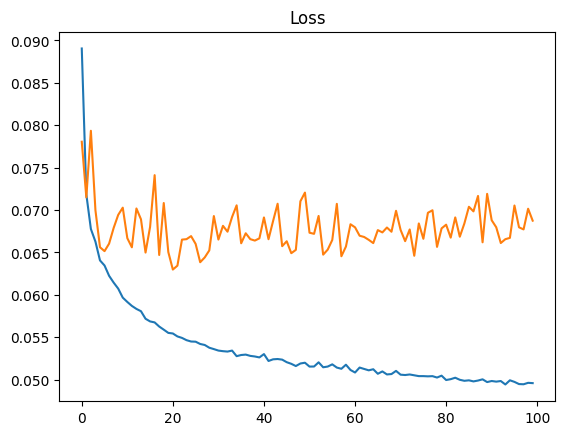

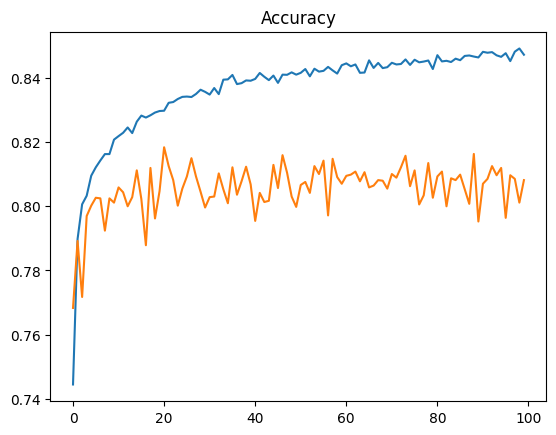

wflc_small_snr0.5_200_aug10_losses.npy
wflc_small 0.5


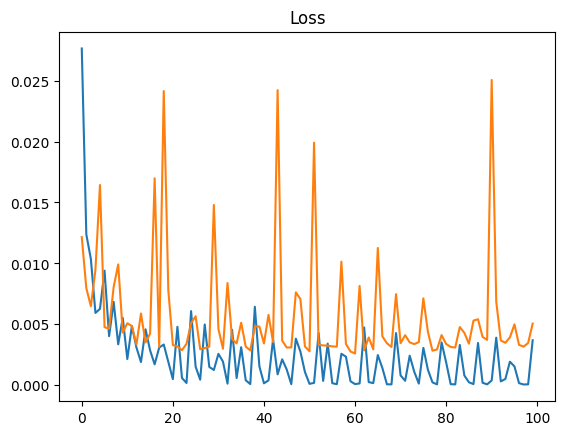

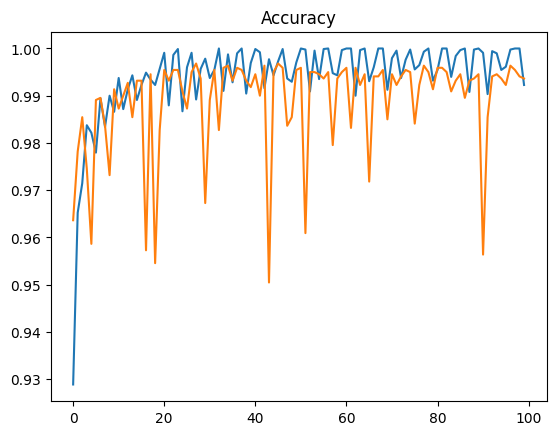

wflc_small_snr1_200_aug10_losses.npy
wflc_small 1


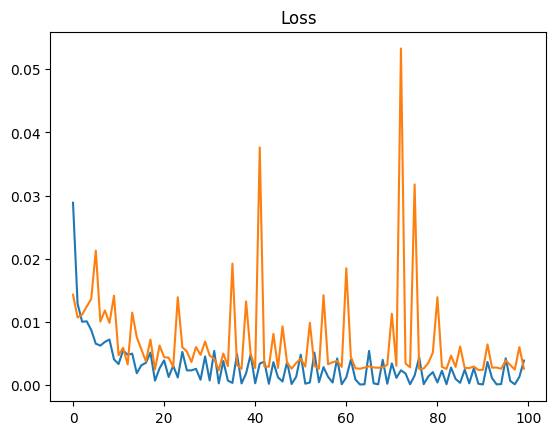

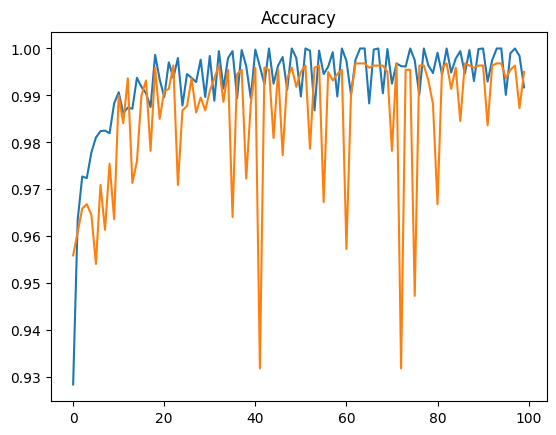

wflc_small_snr0.4_losses.npy
wflc_small 0.4


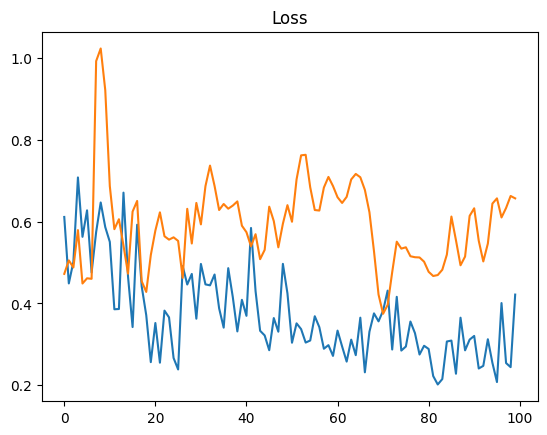

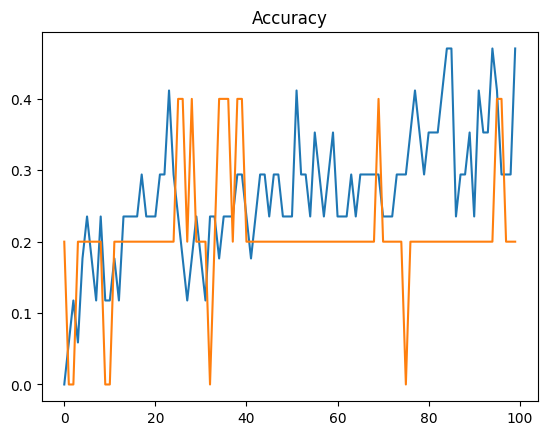

wflc_small_snr2_200_aug10_losses.npy
wflc_small 2


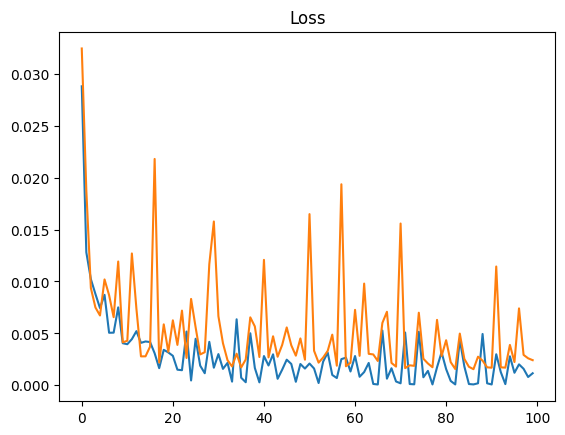

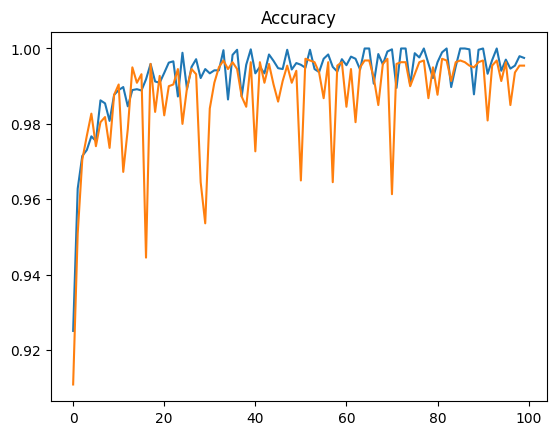

wflc_small_snr2_1_aug10_losses.npy
wflc_small 2


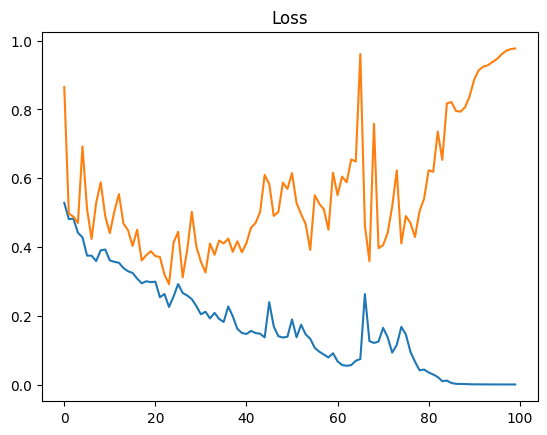

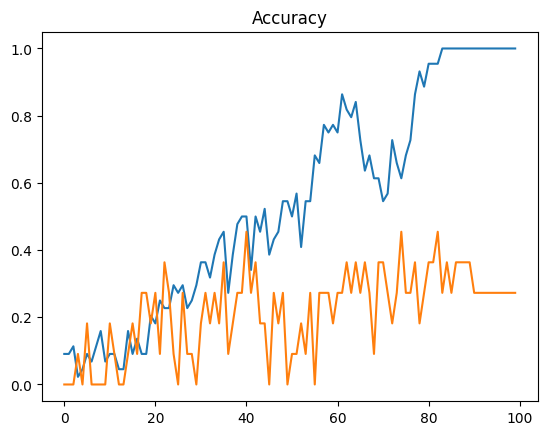

wflc_base_snr2_500_aug10_losses.npy
wflc_base 2


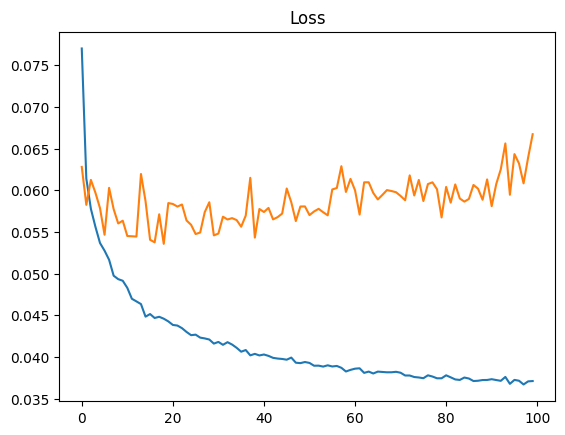

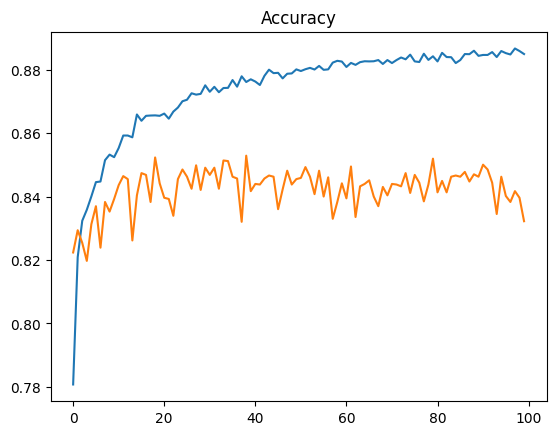

wflc_small_snr10_200_aug10_losses.npy
wflc_small 10


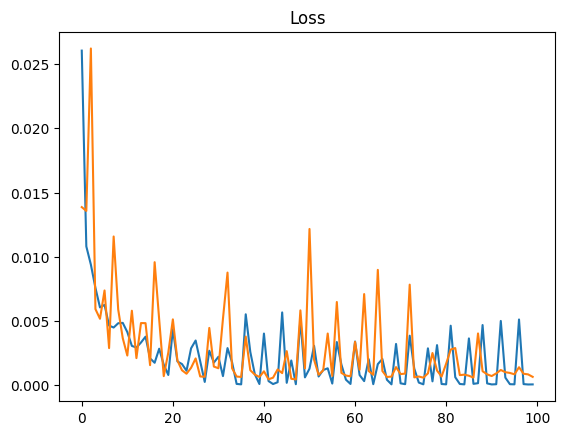

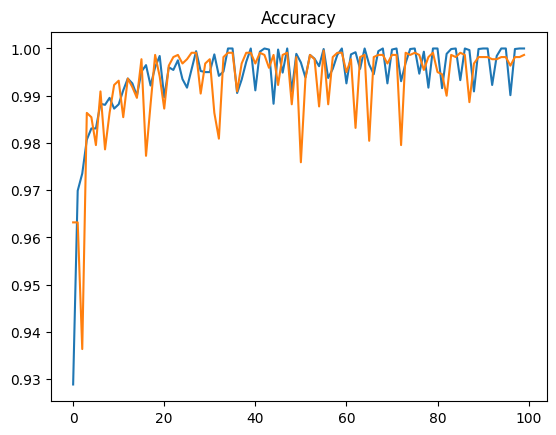

wflc_tiny_snr2_500_aug10_nofreeze_losses.npy
wflc_tiny 2


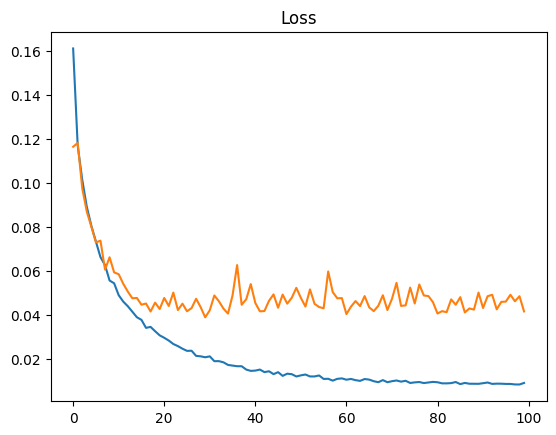

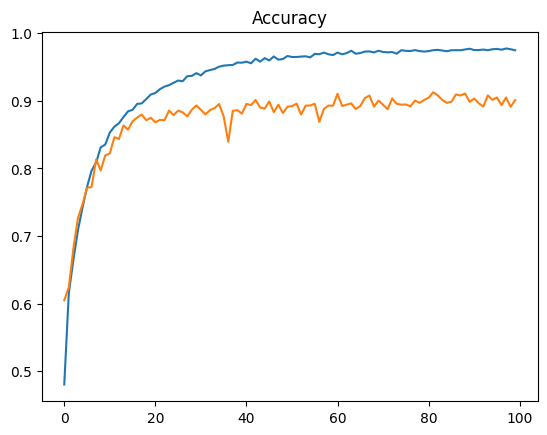

wflc_small_snr0.2_losses.npy
wflc_small 0.2


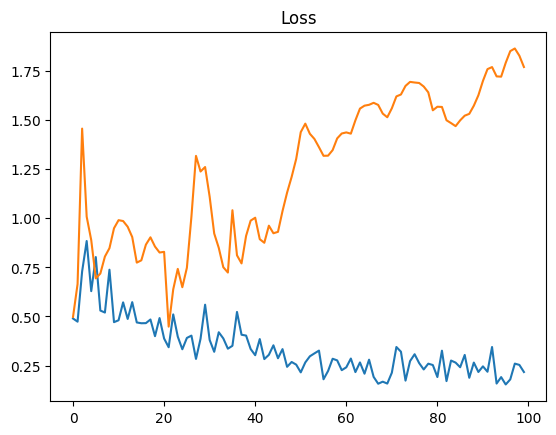

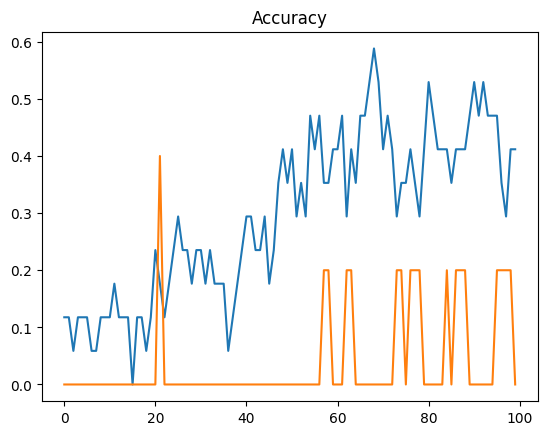

wflc_small_snr0.5_losses.npy
wflc_small 0.5


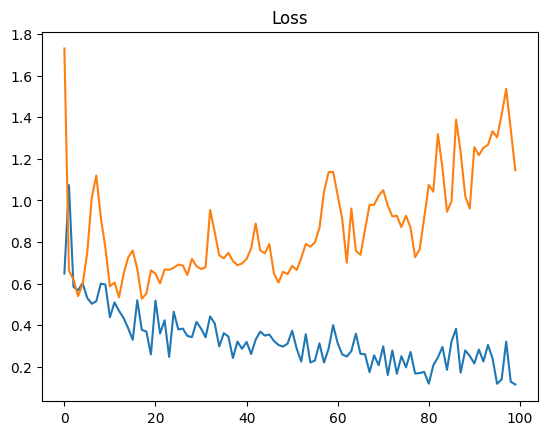

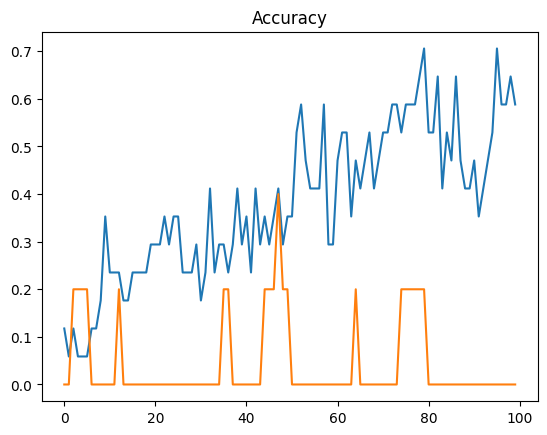

wflc_small_snr0_1000_losses.npy
wflc_small 0


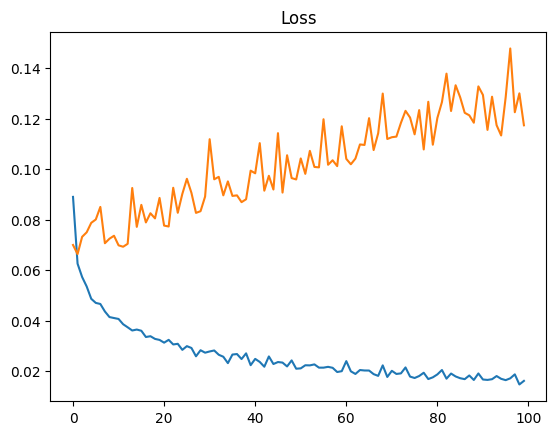

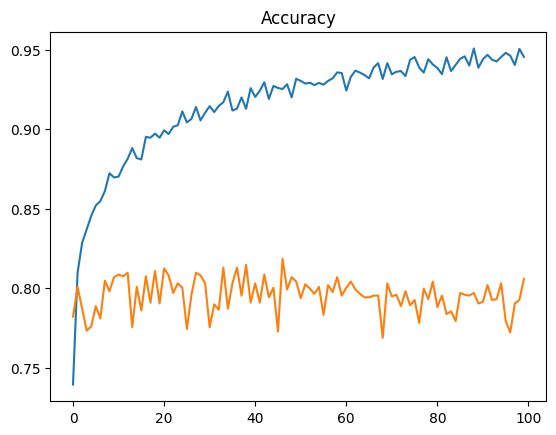

wflc_small_snr1_500_aug10_losses.npy
wflc_small 1


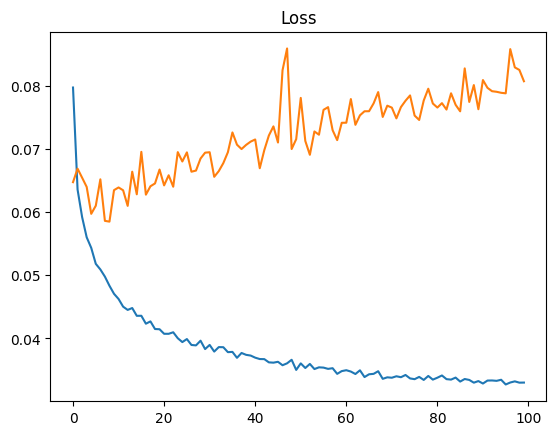

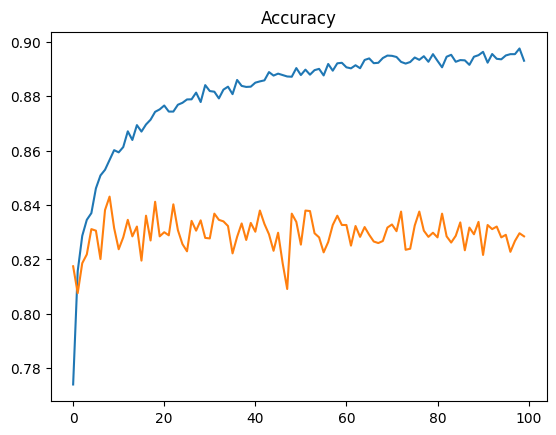

wflc_small_snr0_losses.npy
wflc_small 0


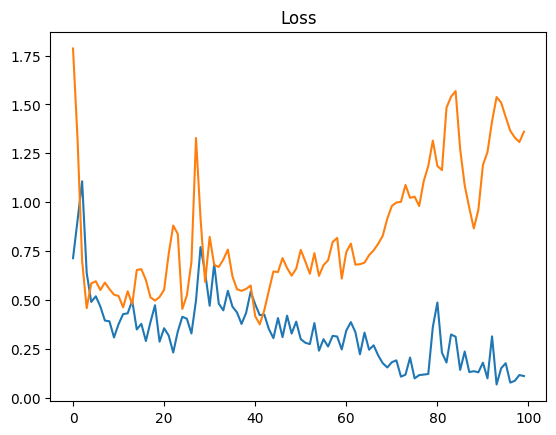

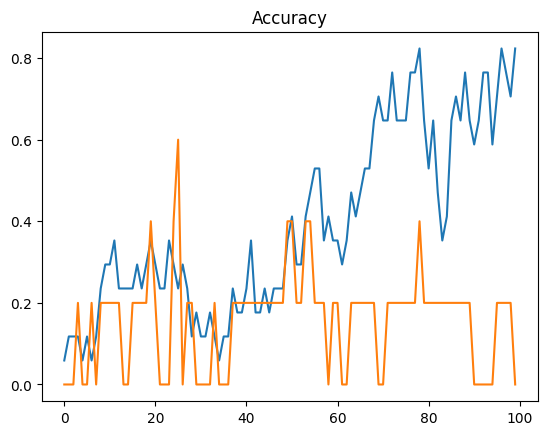

wflc_small_snr0.5_500_aug10_losses.npy
wflc_small 0.5


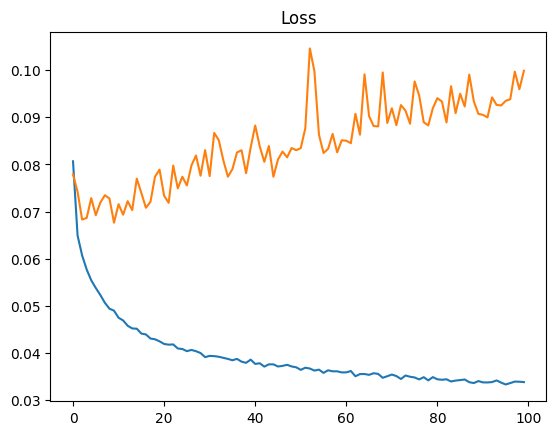

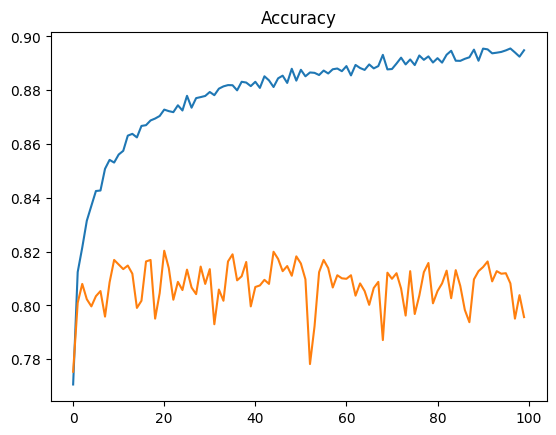

wflc_small_snr1_500_aug10_nofreeze_losses.npy
wflc_small 1


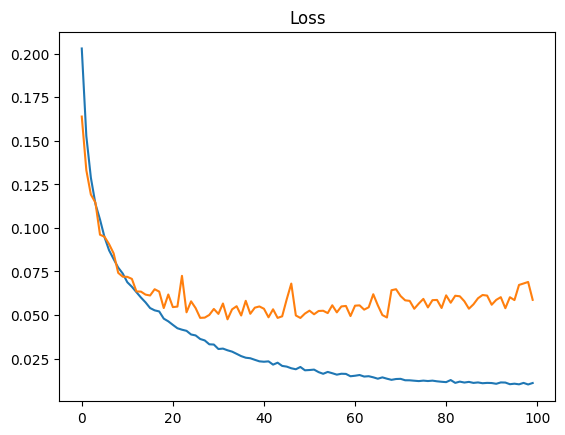

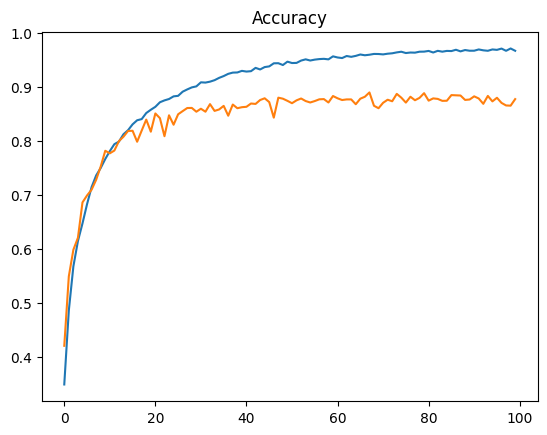

wflc_small_snr1000_200_aug10_losses.npy
wflc_small 1000


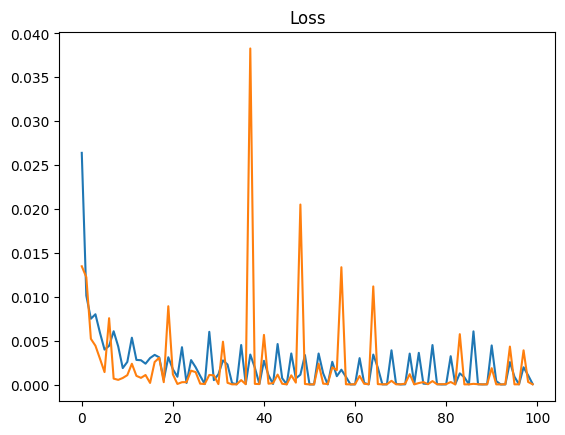

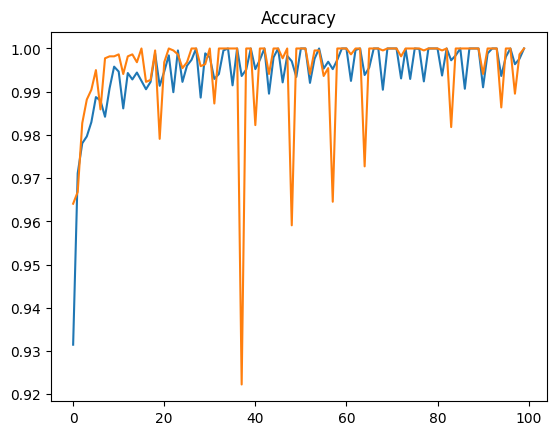

wflc_base_snr2_500_aug10_nofreeze_losses.npy
wflc_base 2


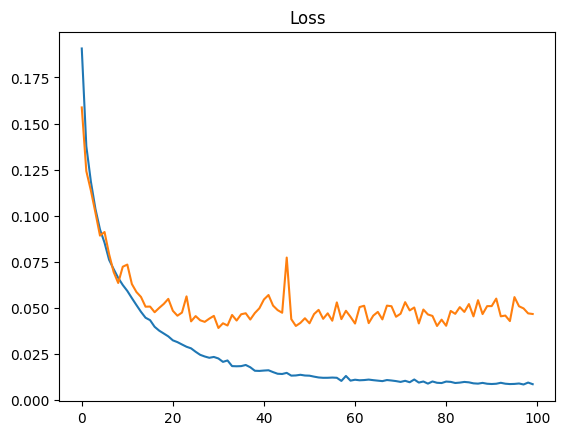

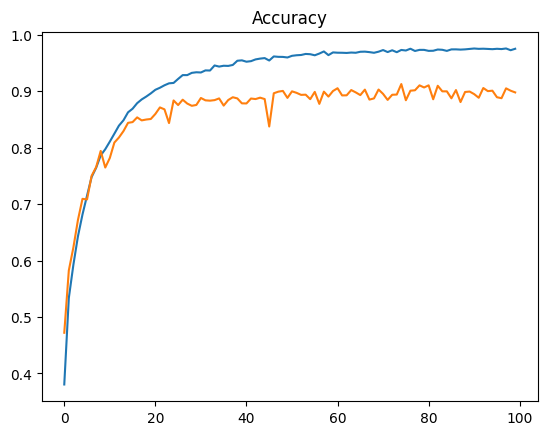

wflc_small_snr2_500_aug10_nofreeze_losses.npy
wflc_small 2


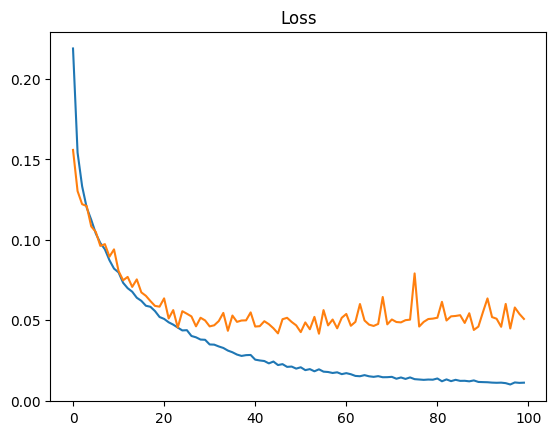

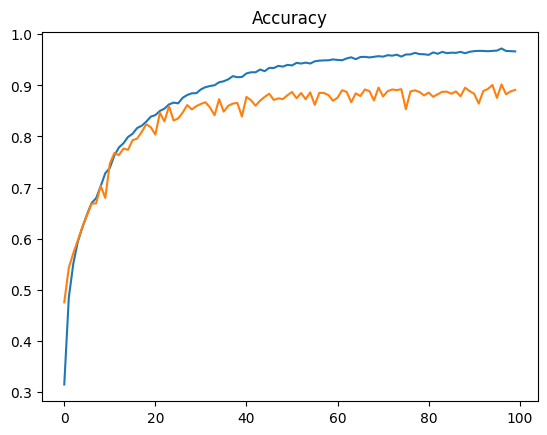

wflc_small_snr5_200_aug10_losses.npy
wflc_small 5


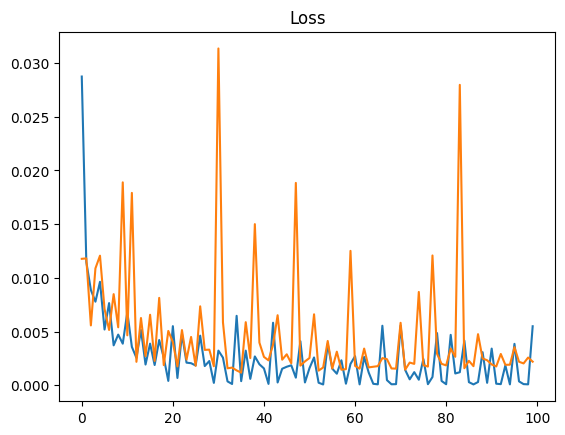

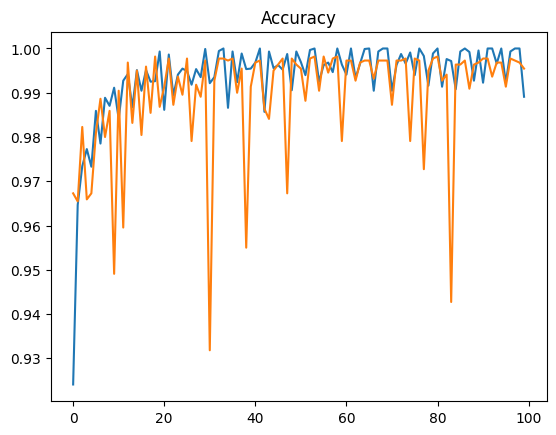

wflc_tiny_snr1_500_aug10_nofreeze_losses.npy
wflc_tiny 1


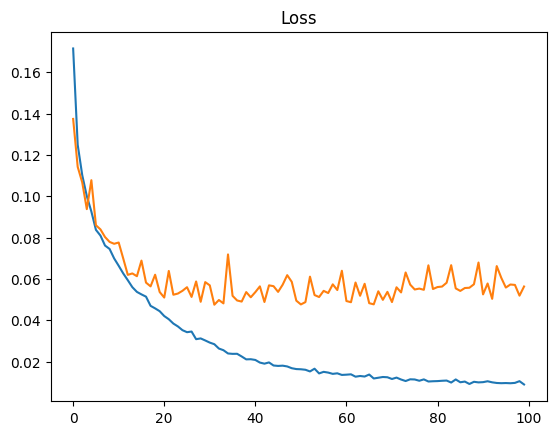

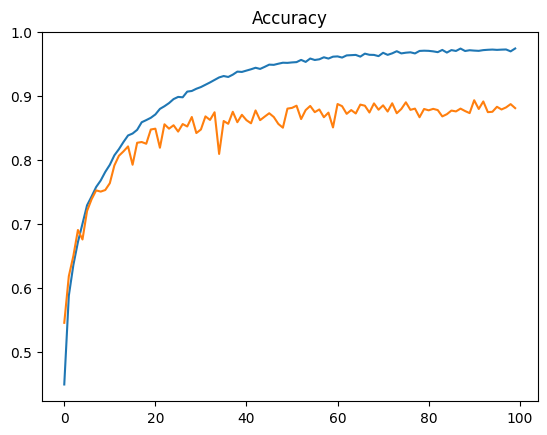

In [3]:
for filename in os.listdir(dir):
    if 'losses' in filename and '.npy' in filename:
        print(filename)
        name_comp = filename.split('_')
        model_name = '_'.join([name_comp[0], name_comp[1]])
        snr = name_comp[2][3:]
        print(model_name, snr)
        
        train_loss, train_acc, val_loss, val_acc = np.load(os.path.join(dir, filename), allow_pickle=True)
        
        plt.plot(train_loss)
        plt.plot(val_loss)
        plt.title('Loss')
        plt.show()
    
        plt.plot(train_acc)
        plt.plot(val_acc)
        plt.title('Accuracy')
        plt.show()

In [4]:
import torch

from models import WhisperForLetterClassification
from configs import WflcConfigs

model_path = 'models/wflc_tiny_snr1_500_aug10_best.npz'

wflc_tiny_config = WflcConfigs.get_config('wflc_tiny')
wflc_tiny = WhisperForLetterClassification(wflc_tiny_config)
wflc_tiny = wflc_tiny.to(device='cuda:0')
wflc_tiny.load_state_dict(torch.load(model_path)['model_state_dict'])

Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-tiny and are newly initialized: ['model.projector.bias', 'model.classifier.weight', 'model.projector.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


<All keys matched successfully>

In [5]:
import librosa
import soundfile as sf

# Reads audio from file. Target sample rate can be set to resample audio to match that.
# If audio is stereo, default to using first channel
def read_audio(path, target_sr=None, channel=0):
    audio, sr = librosa.load(path)
    if target_sr is None or sr == target_sr:
        return audio, sr
    else:
        audio = librosa.resample(audio, orig_sr=sr, target_sr=16000)
        sr = 16000
    return audio, sr

In [9]:
from transformers import WhisperFeatureExtractor
feature_extractor = WhisperFeatureExtractor.from_pretrained('openai/whisper-small')

In [13]:
# Run model on audio from files.
def inference_file(model, feature_extractor, file_path):
    model.eval()
    audio, sr = read_audio(file_path, 16000)
    
    features = feature_extractor(audio, sampling_rate=sr)['input_features'][0][:400]
    features_tensor = torch.unsqueeze(torch.tensor(features), 0).cuda()

    window_length = 150
    window_shift = 100
    window_start = 0
    window_end = window_length
    reach_end = False

    output_list = []
    while True:
        # If window position exceeds feature shape, flag as last window
        if window_end >= features_tensor.size()[2]:
            window_start = features_tensor.size()[2] - window_length
            window_end = features_tensor.size()[2]
    
            reach_end = True
        
        features_slice = features_tensor[:, :, window_start:window_end]
    
        out = model.forward(features_slice)
        output_list.append(out)
        
        # Update Window Position
        window_start += window_shift
        window_end += window_shift
        
        if reach_end:
            break
    return output_list

def check_correct(output_list, correct_class, default_class=10):
    classifications = set([torch.argmax(x).item() for x in output_list])
    # Case where nothing is in the audio
    if len(classifications) == 1 and default_class in classifications and correct_class == default_class:
        return 1

    # Case when default and correct class is in the output
    if len(classifications) == 2 and default_class in classifications and correct_class in classifications:
        return 1

    return 0

In [23]:
from tqdm import tqdm
sloan_letters = ['c', 'd', 'h', 'k', 'n', 'o', 'r', 's', 'v', 'z']
local_dataset_path = 'datasets/local_sloans'
alphadigit_dataset_path = 'datasets/alphadigit_sloans'

def test_model(model_path, model_config, feature_extractor, dataset_path, num_samples):
    model = WhisperForLetterClassification(model_config)
    model = model.to(device='cuda:0')
    model.load_state_dict(torch.load(model_path)['model_state_dict'])

    class_corrects = []
    class_num_checks = []
    class_accuracy = []
    for class_id, sloan_letter in enumerate(tqdm(sloan_letters)):
        class_letter_dir = os.path.join(local_dataset_path, sloan_letter)
        
        class_corrects.append(0)
        class_num_checks.append(0)
    
        choosen_files = np.random.choice(list(os.listdir(class_letter_dir)), num_samples)
        
        for filename in choosen_files:
            file_path = os.path.join(class_letter_dir, filename)
    
            out = inference_file(model, feature_extractor, file_path)
            class_corrects[class_id] += check_correct(out, class_id)
            class_num_checks[class_id] += 1
    
        class_accuracy.append((sloan_letter, class_corrects[class_id]/class_num_checks[class_id]))
    return class_accuracy

def parse_model_name(filename):
    parts = filename.split('_')
    model_name = '_'.join((parts[0], parts[1]))
    num_samples = int(parts[3])
    snr = round(float(parts[2][3:]), 2)
    if 'nofreeze' in filename:
        encoder_type = 'nofreeze'
        checkpoint = parts[6].split('.')[0]
    else:
        encoder_type = 'freeze'
        checkpoint = parts[5].split('.')[0]
    return {
        'model_name': model_name,
        'num_samples': num_samples,
        'snr': snr,
        'encoder_type': encoder_type,
        'checkpoint': checkpoint
    }

def get_models(dir):
    model_filenames = []
    for filename in os.listdir(dir):
        if '.npz' in filename and not 'losses' in filename and 'aug10' in filename:
            model_filenames.append(filename)
    return model_filenames
    

In [24]:
get_models('models')

['wflc_tiny_snr1_500_aug10_last.npz',
 'wflc_small_snr1_200_aug10_best.npz',
 'wflc_small_snr5_200_aug10_best.npz',
 'wflc_small_snr2_500_aug10_nofreeze_last.npz',
 'wflc_small_snr1000_2_aug10_last.npz',
 'wflc_tiny_snr1_500_aug10_best.npz',
 'wflc_tiny_snr2_500_aug10_best.npz',
 'wflc_small_snr0.5_500_aug10_last.npz',
 'wflc_tiny_snr1_500_aug10_nofreeze_last.npz',
 'wflc_small_snr1000_200_aug10_last.npz',
 'wflc_base_snr2_500_aug10_nofreeze_best.npz',
 'wflc_base_snr2_500_aug10_last.npz',
 'wflc_base_snr2_500_aug10_nofreeze_last.npz',
 'wflc_small_snr0.5_500_aug10_best.npz',
 'wflc_tiny_snr2_500_aug10_nofreeze_last.npz',
 'wflc_small_snr1000_200_aug10_best.npz',
 'wflc_tiny_snr2_500_aug10_last.npz',
 'wflc_small_snr1_500_aug10_best.npz',
 'wflc_small_snr2_1_aug10_last.npz',
 'wflc_small_snr1_500_aug10_nofreeze_best.npz',
 'wflc_base_snr2_500_aug10_best.npz',
 'wflc_small_snr2_200_aug10_last.npz',
 'wflc_small_snr2_200_aug10_best.npz',
 'wflc_small_snr1000_2_aug10_best.npz',
 'wflc_sma

In [25]:
feature_extractor = WhisperFeatureExtractor.from_pretrained('openai/whisper-small')
model_filenames = get_models('models')
benchmarks = []
for model_filename in tqdm(model_filenames, desc='Testing Models'):
    model_properties = parse_model_name(model_filename)
    if model_properties['num_samples'] < 200:
        continue
    print(model_properties)
    model_path = os.path.join('models', model_filename)
    model_config = WflcConfigs.get_config(model_properties['model_name'])
    class_accuracies = test_model(model_path, model_config, feature_extractor, alphadigit_dataset_path, 40)
    print(class_accuracies)
    benchmarks.append({'model_config': model_config, 'dataset': 'alphadigit', 'accuracies': class_accuracies})
    
    class_accuracies = test_model(model_path, model_config, feature_extractor, local_dataset_path, 40)
    print(class_accuracies)
    benchmarks.append({'model_config': model_config, 'dataset': 'local', 'accuracies': class_accuracies})

Testing Models:   0%|                                                                          | 0/36 [00:00<?, ?it/s]

{'model_name': 'wflc_tiny', 'num_samples': 500, 'snr': 1.0, 'encoder_type': 'freeze', 'checkpoint': 'last'}


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-tiny and are newly initialized: ['model.projector.bias', 'model.classifier.weight', 'model.projector.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.98s/it]


[('c', 0.675), ('d', 0.55), ('h', 0.55), ('k', 0.7), ('n', 0.35), ('o', 0.625), ('r', 0.5), ('s', 0.6), ('v', 0.65), ('z', 0.175)]


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-tiny and are newly initialized: ['model.projector.bias', 'model.classifier.weight', 'model.projector.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

Testing Models:   3%|█▊                                                                | 1/36 [01:20<47:12, 80.94s/it]

[('c', 0.8), ('d', 0.4), ('h', 0.625), ('k', 0.875), ('n', 0.525), ('o', 0.525), ('r', 0.675), ('s', 0.825), ('v', 0.75), ('z', 0.15)]
{'model_name': 'wflc_small', 'num_samples': 200, 'snr': 1.0, 'encoder_type': 'freeze', 'checkpoint': 'best'}


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-small and are newly initialized: ['model.projector.weight', 'model.projector.bias', 'model.classifier.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [01:07<00:00,  6.73s/it]


[('c', 0.8), ('d', 0.575), ('h', 0.65), ('k', 0.675), ('n', 0.7), ('o', 0.625), ('r', 0.625), ('s', 0.975), ('v', 0.575), ('z', 0.275)]


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-small and are newly initialized: ['model.projector.weight', 'model.projector.bias', 'model.classifier.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

Testing Models:   6%|███▌                                                           | 2/36 [03:37<1:04:31, 113.86s/it]

[('c', 0.625), ('d', 0.75), ('h', 0.525), ('k', 0.5), ('n', 0.65), ('o', 0.675), ('r', 0.625), ('s', 0.95), ('v', 0.425), ('z', 0.35)]
{'model_name': 'wflc_small', 'num_samples': 200, 'snr': 5.0, 'encoder_type': 'freeze', 'checkpoint': 'best'}


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-small and are newly initialized: ['model.projector.weight', 'model.projector.bias', 'model.classifier.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [01:06<00:00,  6.68s/it]


[('c', 0.725), ('d', 0.675), ('h', 0.675), ('k', 0.5), ('n', 0.7), ('o', 0.675), ('r', 0.425), ('s', 0.775), ('v', 0.625), ('z', 0.3)]


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-small and are newly initialized: ['model.projector.weight', 'model.projector.bias', 'model.classifier.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

Testing Models:   8%|█████▎                                                         | 3/36 [05:53<1:08:10, 123.96s/it]

[('c', 0.75), ('d', 0.55), ('h', 0.775), ('k', 0.475), ('n', 0.6), ('o', 0.7), ('r', 0.375), ('s', 0.7), ('v', 0.65), ('z', 0.225)]
{'model_name': 'wflc_small', 'num_samples': 500, 'snr': 2.0, 'encoder_type': 'nofreeze', 'checkpoint': 'last'}


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-small and are newly initialized: ['model.projector.weight', 'model.projector.bias', 'model.classifier.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [01:07<00:00,  6.72s/it]


[('c', 0.3), ('d', 0.15), ('h', 0.375), ('k', 0.275), ('n', 0.475), ('o', 0.725), ('r', 0.6), ('s', 0.25), ('v', 0.525), ('z', 0.075)]


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-small and are newly initialized: ['model.projector.weight', 'model.projector.bias', 'model.classifier.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

Testing Models:  11%|███████                                                        | 4/36 [08:10<1:08:47, 129.00s/it]

[('c', 0.275), ('d', 0.05), ('h', 0.475), ('k', 0.35), ('n', 0.5), ('o', 0.575), ('r', 0.425), ('s', 0.325), ('v', 0.425), ('z', 0.225)]
{'model_name': 'wflc_tiny', 'num_samples': 500, 'snr': 1.0, 'encoder_type': 'freeze', 'checkpoint': 'best'}


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-tiny and are newly initialized: ['model.projector.bias', 'model.classifier.weight', 'model.projector.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.02s/it]


[('c', 0.575), ('d', 0.475), ('h', 0.675), ('k', 0.825), ('n', 0.55), ('o', 0.675), ('r', 0.625), ('s', 0.65), ('v', 0.65), ('z', 0.2)]


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-tiny and are newly initialized: ['model.projector.bias', 'model.classifier.weight', 'model.projector.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

Testing Models:  17%|███████████                                                       | 6/36 [09:31<41:05, 82.18s/it]

[('c', 0.75), ('d', 0.5), ('h', 0.5), ('k', 0.8), ('n', 0.425), ('o', 0.625), ('r', 0.475), ('s', 0.55), ('v', 0.725), ('z', 0.25)]
{'model_name': 'wflc_tiny', 'num_samples': 500, 'snr': 2.0, 'encoder_type': 'freeze', 'checkpoint': 'best'}


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-tiny and are newly initialized: ['model.projector.bias', 'model.classifier.weight', 'model.projector.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.92s/it]


[('c', 0.65), ('d', 0.475), ('h', 0.55), ('k', 0.625), ('n', 0.35), ('o', 0.75), ('r', 0.275), ('s', 0.75), ('v', 0.575), ('z', 0.2)]


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-tiny and are newly initialized: ['model.projector.bias', 'model.classifier.weight', 'model.projector.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

Testing Models:  19%|████████████▊                                                     | 7/36 [10:51<39:25, 81.56s/it]

[('c', 0.825), ('d', 0.525), ('h', 0.7), ('k', 0.6), ('n', 0.525), ('o', 0.65), ('r', 0.275), ('s', 0.775), ('v', 0.65), ('z', 0.35)]
{'model_name': 'wflc_small', 'num_samples': 500, 'snr': 0.5, 'encoder_type': 'freeze', 'checkpoint': 'last'}


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-small and are newly initialized: ['model.projector.weight', 'model.projector.bias', 'model.classifier.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [01:07<00:00,  6.80s/it]


[('c', 0.75), ('d', 0.425), ('h', 0.75), ('k', 0.775), ('n', 0.625), ('o', 0.65), ('r', 0.55), ('s', 0.625), ('v', 0.55), ('z', 0.45)]


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-small and are newly initialized: ['model.projector.weight', 'model.projector.bias', 'model.classifier.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

Testing Models:  22%|██████████████▋                                                   | 8/36 [13:09<45:23, 97.28s/it]

[('c', 0.825), ('d', 0.4), ('h', 0.7), ('k', 0.725), ('n', 0.525), ('o', 0.775), ('r', 0.575), ('s', 0.625), ('v', 0.725), ('z', 0.175)]
{'model_name': 'wflc_tiny', 'num_samples': 500, 'snr': 1.0, 'encoder_type': 'nofreeze', 'checkpoint': 'last'}


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-tiny and are newly initialized: ['model.projector.bias', 'model.classifier.weight', 'model.projector.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.03s/it]


[('c', 0.5), ('d', 0.25), ('h', 0.35), ('k', 0.45), ('n', 0.525), ('o', 0.575), ('r', 0.25), ('s', 0.275), ('v', 0.675), ('z', 0.25)]


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-tiny and are newly initialized: ['model.projector.bias', 'model.classifier.weight', 'model.projector.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

Testing Models:  25%|████████████████▌                                                 | 9/36 [14:30<41:46, 92.84s/it]

[('c', 0.45), ('d', 0.175), ('h', 0.375), ('k', 0.4), ('n', 0.625), ('o', 0.6), ('r', 0.275), ('s', 0.375), ('v', 0.4), ('z', 0.2)]
{'model_name': 'wflc_small', 'num_samples': 200, 'snr': 1000.0, 'encoder_type': 'freeze', 'checkpoint': 'last'}


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-small and are newly initialized: ['model.projector.weight', 'model.projector.bias', 'model.classifier.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [01:07<00:00,  6.76s/it]


[('c', 0.875), ('d', 0.6), ('h', 0.7), ('k', 0.65), ('n', 0.6), ('o', 0.525), ('r', 0.5), ('s', 0.825), ('v', 0.775), ('z', 0.325)]


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-small and are newly initialized: ['model.projector.weight', 'model.projector.bias', 'model.classifier.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

Testing Models:  28%|█████████████████▊                                              | 10/36 [16:48<45:50, 105.78s/it]

[('c', 0.75), ('d', 0.65), ('h', 0.85), ('k', 0.75), ('n', 0.65), ('o', 0.625), ('r', 0.525), ('s', 0.925), ('v', 0.95), ('z', 0.325)]
{'model_name': 'wflc_base', 'num_samples': 500, 'snr': 2.0, 'encoder_type': 'nofreeze', 'checkpoint': 'best'}


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-base and are newly initialized: ['model.projector.weight', 'model.projector.bias', 'model.classifier.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.60s/it]


[('c', 0.375), ('d', 0.2), ('h', 0.325), ('k', 0.325), ('n', 0.675), ('o', 0.35), ('r', 0.6), ('s', 0.25), ('v', 0.55), ('z', 0.05)]


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-base and are newly initialized: ['model.projector.weight', 'model.projector.bias', 'model.classifier.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

Testing Models:  31%|███████████████████▌                                            | 11/36 [18:21<42:34, 102.17s/it]

[('c', 0.525), ('d', 0.225), ('h', 0.425), ('k', 0.275), ('n', 0.7), ('o', 0.55), ('r', 0.325), ('s', 0.35), ('v', 0.6), ('z', 0.325)]
{'model_name': 'wflc_base', 'num_samples': 500, 'snr': 2.0, 'encoder_type': 'freeze', 'checkpoint': 'last'}


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-base and are newly initialized: ['model.projector.weight', 'model.projector.bias', 'model.classifier.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.60s/it]


[('c', 0.825), ('d', 0.525), ('h', 0.775), ('k', 0.875), ('n', 0.4), ('o', 0.725), ('r', 0.425), ('s', 0.725), ('v', 0.275), ('z', 0.375)]


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-base and are newly initialized: ['model.projector.weight', 'model.projector.bias', 'model.classifier.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

Testing Models:  33%|█████████████████████▋                                           | 12/36 [19:55<39:51, 99.67s/it]

[('c', 0.85), ('d', 0.475), ('h', 0.75), ('k', 0.85), ('n', 0.325), ('o', 0.75), ('r', 0.25), ('s', 0.6), ('v', 0.3), ('z', 0.425)]
{'model_name': 'wflc_base', 'num_samples': 500, 'snr': 2.0, 'encoder_type': 'nofreeze', 'checkpoint': 'last'}


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-base and are newly initialized: ['model.projector.weight', 'model.projector.bias', 'model.classifier.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.61s/it]


[('c', 0.375), ('d', 0.2), ('h', 0.35), ('k', 0.25), ('n', 0.55), ('o', 0.425), ('r', 0.45), ('s', 0.275), ('v', 0.625), ('z', 0.2)]


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-base and are newly initialized: ['model.projector.weight', 'model.projector.bias', 'model.classifier.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

Testing Models:  36%|███████████████████████▍                                         | 13/36 [21:29<37:32, 97.94s/it]

[('c', 0.45), ('d', 0.175), ('h', 0.375), ('k', 0.1), ('n', 0.65), ('o', 0.575), ('r', 0.4), ('s', 0.2), ('v', 0.55), ('z', 0.1)]
{'model_name': 'wflc_small', 'num_samples': 500, 'snr': 0.5, 'encoder_type': 'freeze', 'checkpoint': 'best'}


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-small and are newly initialized: ['model.projector.weight', 'model.projector.bias', 'model.classifier.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [01:07<00:00,  6.73s/it]


[('c', 0.725), ('d', 0.45), ('h', 0.725), ('k', 0.825), ('n', 0.55), ('o', 0.675), ('r', 0.6), ('s', 0.5), ('v', 0.7), ('z', 0.375)]


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-small and are newly initialized: ['model.projector.weight', 'model.projector.bias', 'model.classifier.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

Testing Models:  39%|████████████████████████▉                                       | 14/36 [23:45<40:06, 109.39s/it]

[('c', 0.8), ('d', 0.275), ('h', 0.65), ('k', 0.825), ('n', 0.675), ('o', 0.575), ('r', 0.525), ('s', 0.575), ('v', 0.7), ('z', 0.325)]
{'model_name': 'wflc_tiny', 'num_samples': 500, 'snr': 2.0, 'encoder_type': 'nofreeze', 'checkpoint': 'last'}


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-tiny and are newly initialized: ['model.projector.bias', 'model.classifier.weight', 'model.projector.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.02s/it]


[('c', 0.5), ('d', 0.325), ('h', 0.2), ('k', 0.525), ('n', 0.325), ('o', 0.6), ('r', 0.5), ('s', 0.225), ('v', 0.475), ('z', 0.225)]


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-tiny and are newly initialized: ['model.projector.bias', 'model.classifier.weight', 'model.projector.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

Testing Models:  42%|██████████████████████████▋                                     | 15/36 [25:07<35:25, 101.23s/it]

[('c', 0.55), ('d', 0.3), ('h', 0.275), ('k', 0.55), ('n', 0.25), ('o', 0.475), ('r', 0.325), ('s', 0.275), ('v', 0.425), ('z', 0.375)]
{'model_name': 'wflc_small', 'num_samples': 200, 'snr': 1000.0, 'encoder_type': 'freeze', 'checkpoint': 'best'}


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-small and are newly initialized: ['model.projector.weight', 'model.projector.bias', 'model.classifier.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [01:07<00:00,  6.74s/it]


[('c', 0.825), ('d', 0.675), ('h', 0.875), ('k', 0.625), ('n', 0.7), ('o', 0.575), ('r', 0.475), ('s', 0.9), ('v', 0.775), ('z', 0.275)]


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-small and are newly initialized: ['model.projector.weight', 'model.projector.bias', 'model.classifier.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

Testing Models:  44%|████████████████████████████▍                                   | 16/36 [27:25<37:24, 112.21s/it]

[('c', 0.8), ('d', 0.5), ('h', 0.85), ('k', 0.65), ('n', 0.725), ('o', 0.325), ('r', 0.525), ('s', 0.95), ('v', 0.725), ('z', 0.4)]
{'model_name': 'wflc_tiny', 'num_samples': 500, 'snr': 2.0, 'encoder_type': 'freeze', 'checkpoint': 'last'}


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-tiny and are newly initialized: ['model.projector.bias', 'model.classifier.weight', 'model.projector.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.01s/it]


[('c', 0.825), ('d', 0.55), ('h', 0.75), ('k', 0.725), ('n', 0.45), ('o', 0.8), ('r', 0.3), ('s', 0.75), ('v', 0.5), ('z', 0.4)]


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-tiny and are newly initialized: ['model.projector.bias', 'model.classifier.weight', 'model.projector.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

Testing Models:  47%|██████████████████████████████▏                                 | 17/36 [28:46<32:35, 102.91s/it]

[('c', 0.8), ('d', 0.45), ('h', 0.575), ('k', 0.725), ('n', 0.5), ('o', 0.6), ('r', 0.3), ('s', 0.9), ('v', 0.675), ('z', 0.15)]
{'model_name': 'wflc_small', 'num_samples': 500, 'snr': 1.0, 'encoder_type': 'freeze', 'checkpoint': 'best'}


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-small and are newly initialized: ['model.projector.weight', 'model.projector.bias', 'model.classifier.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [01:07<00:00,  6.76s/it]


[('c', 0.575), ('d', 0.5), ('h', 0.725), ('k', 0.575), ('n', 0.8), ('o', 0.6), ('r', 0.7), ('s', 0.65), ('v', 0.75), ('z', 0.3)]


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-small and are newly initialized: ['model.projector.weight', 'model.projector.bias', 'model.classifier.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

Testing Models:  50%|████████████████████████████████                                | 18/36 [31:04<33:57, 113.20s/it]

[('c', 0.575), ('d', 0.45), ('h', 0.65), ('k', 0.675), ('n', 0.825), ('o', 0.55), ('r', 0.5), ('s', 0.775), ('v', 0.8), ('z', 0.425)]
{'model_name': 'wflc_small', 'num_samples': 500, 'snr': 1.0, 'encoder_type': 'nofreeze', 'checkpoint': 'best'}


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-small and are newly initialized: ['model.projector.weight', 'model.projector.bias', 'model.classifier.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [01:07<00:00,  6.74s/it]


[('c', 0.0), ('d', 0.0), ('h', 0.0), ('k', 0.025), ('n', 0.0), ('o', 0.0), ('r', 0.0), ('s', 0.0), ('v', 0.025), ('z', 0.0)]


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-small and are newly initialized: ['model.projector.weight', 'model.projector.bias', 'model.classifier.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

Testing Models:  56%|████████████████████████████████████                             | 20/36 [33:20<24:40, 92.52s/it]

[('c', 0.0), ('d', 0.0), ('h', 0.0), ('k', 0.1), ('n', 0.0), ('o', 0.0), ('r', 0.0), ('s', 0.0), ('v', 0.025), ('z', 0.0)]
{'model_name': 'wflc_base', 'num_samples': 500, 'snr': 2.0, 'encoder_type': 'freeze', 'checkpoint': 'best'}


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-base and are newly initialized: ['model.projector.weight', 'model.projector.bias', 'model.classifier.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.64s/it]


[('c', 0.775), ('d', 0.5), ('h', 0.625), ('k', 0.85), ('n', 0.525), ('o', 0.625), ('r', 0.375), ('s', 0.775), ('v', 0.3), ('z', 0.375)]


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-base and are newly initialized: ['model.projector.weight', 'model.projector.bias', 'model.classifier.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

Testing Models:  58%|█████████████████████████████████████▉                           | 21/36 [34:55<23:14, 92.99s/it]

[('c', 0.725), ('d', 0.525), ('h', 0.675), ('k', 0.9), ('n', 0.5), ('o', 0.625), ('r', 0.325), ('s', 0.85), ('v', 0.375), ('z', 0.325)]
{'model_name': 'wflc_small', 'num_samples': 200, 'snr': 2.0, 'encoder_type': 'freeze', 'checkpoint': 'last'}


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-small and are newly initialized: ['model.projector.weight', 'model.projector.bias', 'model.classifier.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [01:07<00:00,  6.74s/it]


[('c', 0.725), ('d', 0.625), ('h', 0.35), ('k', 0.65), ('n', 0.75), ('o', 0.725), ('r', 0.25), ('s', 0.85), ('v', 0.7), ('z', 0.3)]


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-small and are newly initialized: ['model.projector.weight', 'model.projector.bias', 'model.classifier.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

Testing Models:  61%|███████████████████████████████████████                         | 22/36 [37:12<24:23, 104.56s/it]

[('c', 0.875), ('d', 0.6), ('h', 0.425), ('k', 0.65), ('n', 0.675), ('o', 0.7), ('r', 0.375), ('s', 0.95), ('v', 0.775), ('z', 0.3)]
{'model_name': 'wflc_small', 'num_samples': 200, 'snr': 2.0, 'encoder_type': 'freeze', 'checkpoint': 'best'}


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-small and are newly initialized: ['model.projector.weight', 'model.projector.bias', 'model.classifier.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [01:07<00:00,  6.73s/it]


[('c', 0.875), ('d', 0.575), ('h', 0.65), ('k', 0.775), ('n', 0.75), ('o', 0.8), ('r', 0.3), ('s', 0.9), ('v', 0.7), ('z', 0.225)]


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-small and are newly initialized: ['model.projector.weight', 'model.projector.bias', 'model.classifier.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

Testing Models:  64%|████████████████████████████████████████▉                       | 23/36 [39:29<24:32, 113.25s/it]

[('c', 0.775), ('d', 0.5), ('h', 0.55), ('k', 0.575), ('n', 0.65), ('o', 0.725), ('r', 0.325), ('s', 0.9), ('v', 0.75), ('z', 0.2)]
{'model_name': 'wflc_small', 'num_samples': 200, 'snr': 0.5, 'encoder_type': 'freeze', 'checkpoint': 'last'}


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-small and are newly initialized: ['model.projector.weight', 'model.projector.bias', 'model.classifier.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [01:07<00:00,  6.74s/it]


[('c', 0.775), ('d', 0.5), ('h', 0.675), ('k', 0.75), ('n', 0.975), ('o', 0.45), ('r', 0.375), ('s', 0.575), ('v', 0.6), ('z', 0.325)]


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-small and are newly initialized: ['model.projector.weight', 'model.projector.bias', 'model.classifier.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

Testing Models:  69%|█████████████████████████████████████████████▏                   | 25/36 [41:46<17:10, 93.68s/it]

[('c', 0.725), ('d', 0.5), ('h', 0.575), ('k', 0.7), ('n', 0.9), ('o', 0.4), ('r', 0.1), ('s', 0.45), ('v', 0.675), ('z', 0.325)]
{'model_name': 'wflc_tiny', 'num_samples': 500, 'snr': 1.0, 'encoder_type': 'nofreeze', 'checkpoint': 'best'}


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-tiny and are newly initialized: ['model.projector.bias', 'model.classifier.weight', 'model.projector.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.95s/it]


[('c', 0.4), ('d', 0.275), ('h', 0.375), ('k', 0.45), ('n', 0.475), ('o', 0.675), ('r', 0.275), ('s', 0.35), ('v', 0.65), ('z', 0.05)]


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-tiny and are newly initialized: ['model.projector.bias', 'model.classifier.weight', 'model.projector.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

Testing Models:  72%|██████████████████████████████████████████████▉                  | 26/36 [43:06<15:05, 90.53s/it]

[('c', 0.475), ('d', 0.175), ('h', 0.35), ('k', 0.375), ('n', 0.425), ('o', 0.5), ('r', 0.375), ('s', 0.25), ('v', 0.575), ('z', 0.25)]
{'model_name': 'wflc_small', 'num_samples': 200, 'snr': 0.5, 'encoder_type': 'freeze', 'checkpoint': 'best'}


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-small and are newly initialized: ['model.projector.weight', 'model.projector.bias', 'model.classifier.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [01:07<00:00,  6.72s/it]


[('c', 0.8), ('d', 0.5), ('h', 0.75), ('k', 0.7), ('n', 0.9), ('o', 0.4), ('r', 0.25), ('s', 0.425), ('v', 0.825), ('z', 0.125)]


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-small and are newly initialized: ['model.projector.weight', 'model.projector.bias', 'model.classifier.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

Testing Models:  75%|████████████████████████████████████████████████                | 27/36 [45:23<15:20, 102.27s/it]

[('c', 0.8), ('d', 0.625), ('h', 0.575), ('k', 0.7), ('n', 0.875), ('o', 0.35), ('r', 0.2), ('s', 0.625), ('v', 0.575), ('z', 0.225)]
{'model_name': 'wflc_tiny', 'num_samples': 500, 'snr': 2.0, 'encoder_type': 'nofreeze', 'checkpoint': 'best'}


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-tiny and are newly initialized: ['model.projector.bias', 'model.classifier.weight', 'model.projector.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.02s/it]


[('c', 0.45), ('d', 0.45), ('h', 0.25), ('k', 0.625), ('n', 0.15), ('o', 0.55), ('r', 0.45), ('s', 0.2), ('v', 0.55), ('z', 0.275)]


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-tiny and are newly initialized: ['model.projector.bias', 'model.classifier.weight', 'model.projector.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

Testing Models:  78%|██████████████████████████████████████████████████▌              | 28/36 [46:44<12:53, 96.73s/it]

[('c', 0.425), ('d', 0.4), ('h', 0.25), ('k', 0.4), ('n', 0.175), ('o', 0.75), ('r', 0.6), ('s', 0.225), ('v', 0.4), ('z', 0.45)]
{'model_name': 'wflc_small', 'num_samples': 500, 'snr': 1.0, 'encoder_type': 'freeze', 'checkpoint': 'last'}


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-small and are newly initialized: ['model.projector.weight', 'model.projector.bias', 'model.classifier.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [01:06<00:00,  6.69s/it]


[('c', 0.675), ('d', 0.625), ('h', 0.6), ('k', 0.75), ('n', 0.675), ('o', 0.35), ('r', 0.625), ('s', 0.825), ('v', 0.65), ('z', 0.4)]


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-small and are newly initialized: ['model.projector.weight', 'model.projector.bias', 'model.classifier.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

Testing Models:  81%|███████████████████████████████████████████████████▌            | 29/36 [49:01<12:33, 107.63s/it]

[('c', 0.75), ('d', 0.575), ('h', 0.625), ('k', 0.625), ('n', 0.6), ('o', 0.45), ('r', 0.675), ('s', 0.675), ('v', 0.725), ('z', 0.2)]
{'model_name': 'wflc_small', 'num_samples': 200, 'snr': 5.0, 'encoder_type': 'freeze', 'checkpoint': 'last'}


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-small and are newly initialized: ['model.projector.weight', 'model.projector.bias', 'model.classifier.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [01:07<00:00,  6.72s/it]


[('c', 0.8), ('d', 0.525), ('h', 0.8), ('k', 0.4), ('n', 0.75), ('o', 0.725), ('r', 0.375), ('s', 0.65), ('v', 0.625), ('z', 0.175)]


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-small and are newly initialized: ['model.projector.weight', 'model.projector.bias', 'model.classifier.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

Testing Models:  83%|█████████████████████████████████████████████████████▎          | 30/36 [51:17<11:35, 115.84s/it]

[('c', 0.825), ('d', 0.55), ('h', 0.9), ('k', 0.575), ('n', 0.75), ('o', 0.7), ('r', 0.325), ('s', 0.725), ('v', 0.675), ('z', 0.275)]
{'model_name': 'wflc_small', 'num_samples': 500, 'snr': 2.0, 'encoder_type': 'nofreeze', 'checkpoint': 'best'}


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-small and are newly initialized: ['model.projector.weight', 'model.projector.bias', 'model.classifier.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [01:06<00:00,  6.69s/it]


[('c', 0.35), ('d', 0.05), ('h', 0.475), ('k', 0.3), ('n', 0.475), ('o', 0.65), ('r', 0.375), ('s', 0.225), ('v', 0.375), ('z', 0.125)]


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-small and are newly initialized: ['model.projector.weight', 'model.projector.bias', 'model.classifier.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

Testing Models:  86%|███████████████████████████████████████████████████████         | 31/36 [53:34<10:09, 121.82s/it]

[('c', 0.3), ('d', 0.025), ('h', 0.325), ('k', 0.375), ('n', 0.525), ('o', 0.575), ('r', 0.425), ('s', 0.45), ('v', 0.625), ('z', 0.15)]
{'model_name': 'wflc_small', 'num_samples': 500, 'snr': 1.0, 'encoder_type': 'nofreeze', 'checkpoint': 'last'}


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-small and are newly initialized: ['model.projector.weight', 'model.projector.bias', 'model.classifier.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [01:06<00:00,  6.68s/it]


[('c', 0.0), ('d', 0.0), ('h', 0.0), ('k', 0.075), ('n', 0.0), ('o', 0.0), ('r', 0.0), ('s', 0.0), ('v', 0.0), ('z', 0.0)]


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-small and are newly initialized: ['model.projector.weight', 'model.projector.bias', 'model.classifier.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

Testing Models:  89%|████████████████████████████████████████████████████████▉       | 32/36 [55:51<08:24, 126.15s/it]

[('c', 0.0), ('d', 0.0), ('h', 0.0), ('k', 0.1), ('n', 0.0), ('o', 0.0), ('r', 0.0), ('s', 0.0), ('v', 0.0), ('z', 0.0)]
{'model_name': 'wflc_small', 'num_samples': 200, 'snr': 10.0, 'encoder_type': 'freeze', 'checkpoint': 'last'}


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-small and are newly initialized: ['model.projector.weight', 'model.projector.bias', 'model.classifier.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [01:07<00:00,  6.72s/it]


[('c', 0.825), ('d', 0.675), ('h', 0.625), ('k', 0.725), ('n', 0.7), ('o', 0.5), ('r', 0.3), ('s', 0.725), ('v', 0.65), ('z', 0.475)]


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-small and are newly initialized: ['model.projector.weight', 'model.projector.bias', 'model.classifier.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

Testing Models:  94%|█████████████████████████████████████████████████████████████▍   | 34/36 [58:08<03:19, 99.97s/it]

[('c', 0.875), ('d', 0.575), ('h', 0.75), ('k', 0.825), ('n', 0.675), ('o', 0.675), ('r', 0.425), ('s', 0.7), ('v', 0.625), ('z', 0.45)]
{'model_name': 'wflc_small', 'num_samples': 200, 'snr': 10.0, 'encoder_type': 'freeze', 'checkpoint': 'best'}


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-small and are newly initialized: ['model.projector.weight', 'model.projector.bias', 'model.classifier.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [01:07<00:00,  6.75s/it]


[('c', 0.875), ('d', 0.725), ('h', 0.7), ('k', 0.75), ('n', 0.675), ('o', 0.525), ('r', 0.375), ('s', 0.7), ('v', 0.525), ('z', 0.375)]


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-small and are newly initialized: ['model.projector.weight', 'model.projector.bias', 'model.classifier.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

Testing Models:  97%|████████████████████████████████████████████████████████████▎ | 35/36 [1:00:24<01:48, 108.97s/it]

[('c', 0.775), ('d', 0.7), ('h', 0.575), ('k', 0.775), ('n', 0.725), ('o', 0.65), ('r', 0.35), ('s', 0.675), ('v', 0.7), ('z', 0.35)]
{'model_name': 'wflc_small', 'num_samples': 200, 'snr': 1.0, 'encoder_type': 'freeze', 'checkpoint': 'last'}


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-small and are newly initialized: ['model.projector.weight', 'model.projector.bias', 'model.classifier.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [01:07<00:00,  6.75s/it]


[('c', 0.675), ('d', 0.725), ('h', 0.675), ('k', 0.725), ('n', 0.525), ('o', 0.575), ('r', 0.35), ('s', 1.0), ('v', 0.55), ('z', 0.45)]


Some weights of WhisperForAudioClassification were not initialized from the model checkpoint at openai/whisper-small and are newly initialized: ['model.projector.weight', 'model.projector.bias', 'model.classifier.weight', 'model.classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

Testing Models: 100%|██████████████████████████████████████████████████████████████| 36/36 [1:02:41<00:00, 104.49s/it]

[('c', 0.7), ('d', 0.725), ('h', 0.65), ('k', 0.475), ('n', 0.7), ('o', 0.6), ('r', 0.4), ('s', 0.95), ('v', 0.5), ('z', 0.4)]


In [27]:
np.save(f'models/benchmarks_17_12_23.npy', np.array(benchmarks, dtype=object), allow_pickle=True)

In [96]:
benchmarks = np.load(f'models/benchmarks_17_12_23.npy', allow_pickle=True)
benchmarks

array([{'model_properties': {'model_name': 'wflc_tiny', 'num_samples': 500, 'snr': 1.0, 'encoder_type': 'freeze', 'checkpoint': 'last'}, 'dataset': 'alphadigit', 'accuracies': [('c', 0.7), ('d', 0.65), ('h', 0.625), ('k', 0.675), ('n', 0.6), ('o', 0.475), ('r', 0.75), ('s', 0.6), ('v', 0.7), ('z', 0.275)]},
       {'model_properties': {'model_name': 'wflc_tiny', 'num_samples': 500, 'snr': 1.0, 'encoder_type': 'freeze', 'checkpoint': 'last'}, 'dataset': 'local', 'accuracies': [('c', 0.65), ('d', 0.5), ('h', 0.5), ('k', 0.7), ('n', 0.5), ('o', 0.6), ('r', 0.625), ('s', 0.725), ('v', 0.625), ('z', 0.25)]},
       {'model_properties': {'model_name': 'wflc_small', 'num_samples': 200, 'snr': 1.0, 'encoder_type': 'freeze', 'checkpoint': 'best'}, 'dataset': 'alphadigit', 'accuracies': [('c', 0.825), ('d', 0.675), ('h', 0.575), ('k', 0.525), ('n', 0.725), ('o', 0.5), ('r', 0.675), ('s', 0.975), ('v', 0.7), ('z', 0.35)]},
       {'model_properties': {'model_name': 'wflc_small', 'num_samples': 20

In [88]:
import pandas

In [175]:
model_name_list = []
num_samples_list = []
snr_list = []
frozen_encoder_list = []
checkpoint_list = []
alphadigit_accuracy_list = []
local_accuracy_list = []

alphadigit_result_dict = {}
local_result_dict = {}

training_metrics_dict = {
    'Best Training Loss': [],
    'Best Validation Loss': [],
    'Best Training Accuracy': [],
    'Best Validation Accuracy': [],
}

for letter in sloan_letters:
    alphadigit_result_dict[letter] = []
    local_result_dict[letter] = []

for result in benchmarks:
    avg_accuracy = 0
    for letter_accuracy in result['accuracies']:
        avg_accuracy += letter_accuracy[1]

    avg_accuracy /= len(result['accuracies'])
    
    if result['dataset'] == 'local':
        local_accuracy_list.append(avg_accuracy)
        for letter_accuracy in result['accuracies']:
            local_result_dict[letter_accuracy[0]].append(letter_accuracy[1])

        # Append model configs
        model_properties = result['model_properties']
    
        model_name_list.append(model_properties['model_name'])
        num_samples_list.append(model_properties['num_samples'])
        snr_list.append(model_properties['snr'])
        if model_properties['encoder_type'] == 'freeze':
            frozen_encoder_list.append(True)
        else:
            frozen_encoder_list.append(False)
        checkpoint_list.append(model_properties['checkpoint'])

        
        if model_properties['snr'] == 0.5:
            snr_string = '0.5'
        else:
            snr_string = str(int(model_properties['snr']))

        training_losses = '_'.join([
            model_properties['model_name'], 
            'snr' + snr_string, 
            str(model_properties['num_samples']),
            'aug10'
        ])
        if model_properties['encoder_type'] == 'nofreeze':
            training_losses += '_nofreeze'
        training_losses += '_losses.npy'

        training_losses_path = os.path.join('models', training_losses)
        train_losses, train_accuracies, val_losses, val_accuracies = np.load(training_losses_path, allow_pickle=True)
        training_metrics_dict['Best Training Loss'].append(np.min(train_losses))
        training_metrics_dict['Best Training Accuracy'].append(np.max(train_accuracies))
        training_metrics_dict['Best Validation Loss'].append(np.min(val_losses))
        training_metrics_dict['Best Validation Accuracy'].append(np.max(val_accuracies))

    else:
        alphadigit_accuracy_list.append(avg_accuracy)
        for letter_accuracy in result['accuracies']:
            alphadigit_result_dict[letter_accuracy[0]].append(letter_accuracy[1])



base_dict = {
    'Model Name': model_name_list,
    '# Samples': num_samples_list,
    'SNR': snr_list,
    'Frozen Encoder': frozen_encoder_list,
    'Checkpoint': checkpoint_list,
    
}

summary_df = pandas.DataFrame({
    **base_dict,
    **training_metrics_dict,
    'AlphaDigit Accuracy': alphadigit_accuracy_list,
    'Local Accuracy': local_accuracy_list
}).sort_values(['Local Accuracy', 'AlphaDigit Accuracy'], ascending=[False, False])

alphadigit_df = pandas.DataFrame({
    **base_dict,
    **alphadigit_result_dict,
    'Average Accuracy': alphadigit_accuracy_list
}).sort_values(['Average Accuracy'], ascending=[False])

local_df = pandas.DataFrame({
    **base_dict,
    **local_result_dict,
    'Average Accuracy': local_accuracy_list
}).sort_values(['Average Accuracy'], ascending=[False])

full_df = pandas.DataFrame({
    **alphadigit_result_dict,
})

In [177]:
full_df

,c,d,h,k,n,o,r,s,v,z
0,0.700,0.650,0.625,0.675,0.600,0.475,0.750,0.600,0.700,0.275
1,0.825,0.675,0.575,0.525,0.725,0.500,0.675,0.975,0.700,0.350
2,0.700,0.600,0.700,0.500,0.775,0.775,0.300,0.675,0.650,0.225
3,0.225,0.150,0.425,0.425,0.600,0.650,0.600,0.300,0.550,0.150
4,0.625,0.575,0.725,0.825,0.625,0.575,0.600,0.700,0.750,0.125
5,0.775,0.625,0.575,0.700,0.475,0.775,0.350,0.750,0.625,0.350
6,0.675,0.425,0.750,0.675,0.700,0.700,0.525,0.700,0.725,0.400
7,0.525,0.125,0.400,0.425,0.375,0.500,0.425,0.425,0.650,0.250
8,0.750,0.525,0.750,0.800,0.625,0.750,0.500,0.950,0.800,0.200
9,0.425,0.100,0.375,0.275,0.700,0.525,0.400,0.300,0.450,0.200


In [164]:
summary_df

,Model Name,# Samples,SNR,Frozen Encoder,Checkpoint,Best Training Loss,Best Validation Loss,Best Training Accuracy,Best Validation Accuracy,AlphaDigit Accuracy,Local Accuracy
29,wflc_small,200,10.0,True,last,0.000056,0.000446,1.000000,0.999545,0.6425,0.6825
14,wflc_small,200,1000.0,True,best,0.000058,0.000061,1.000000,1.000000,0.6900,0.6625
8,wflc_small,200,1000.0,True,last,0.000058,0.000061,1.000000,1.000000,0.6650,0.6525
30,wflc_small,200,10.0,True,best,0.000056,0.000446,1.000000,0.999545,0.7025,0.6500
1,wflc_small,200,1.0,True,best,0.000074,0.002320,1.000000,0.996818,0.6525,0.6500
25,wflc_small,500,1.0,True,last,0.032715,0.058480,0.897533,0.843074,0.6400,0.6475
26,wflc_small,200,5.0,True,last,0.000068,0.001171,1.000000,0.998182,0.5975,0.6425
31,wflc_small,200,1.0,True,last,0.000074,0.002320,1.000000,0.996818,0.5975,0.6275
2,wflc_small,200,5.0,True,best,0.000068,0.001171,1.000000,0.998182,0.5900,0.6275
4,wflc_tiny,500,1.0,True,best,0.049430,0.062978,0.849194,0.818406,0.6125,0.6000


<Axes: >

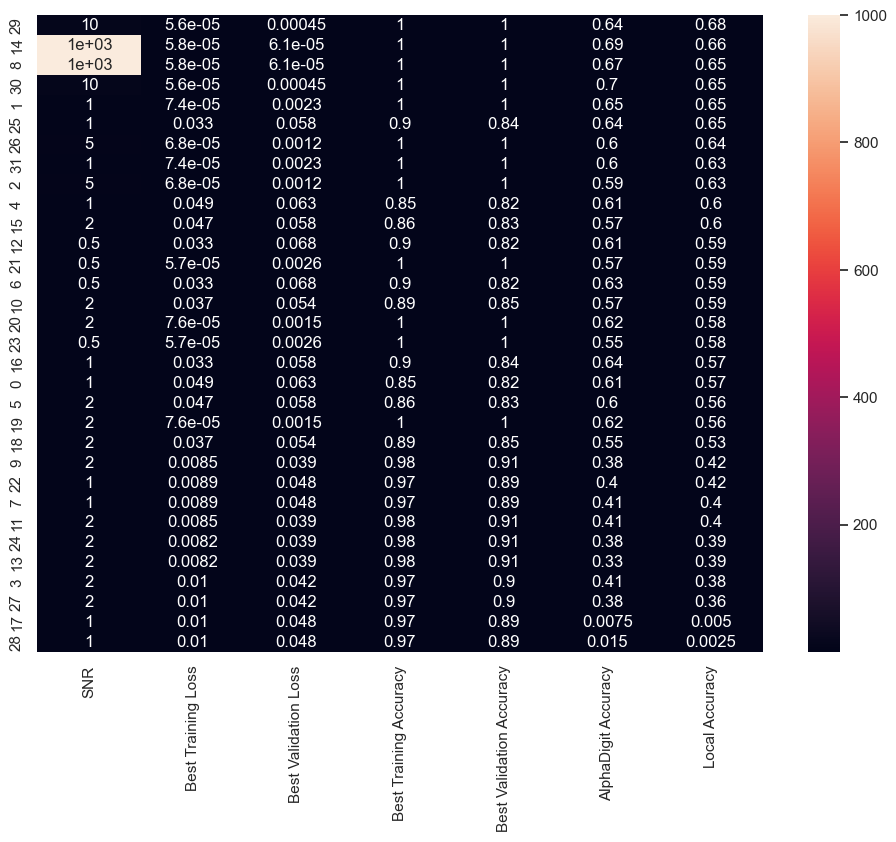

In [167]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(summary_df[['SNR'] + list(summary_df.columns)[-6:]], annot=True)

In [150]:
alphadigit_df

,Model Name,# Samples,SNR,Frozen Encoder,Checkpoint,c,d,h,k,n,o,r,s,v,z,Average Accuracy
30,wflc_small,200,10.0,True,best,0.900,0.875,0.725,0.825,0.775,0.600,0.425,0.725,0.675,0.500,0.7025
14,wflc_small,200,1000.0,True,best,0.875,0.650,0.875,0.675,0.725,0.650,0.500,0.775,0.875,0.300,0.6900
8,wflc_small,200,1000.0,True,last,0.750,0.525,0.750,0.800,0.625,0.750,0.500,0.950,0.800,0.200,0.6650
1,wflc_small,200,1.0,True,best,0.825,0.675,0.575,0.525,0.725,0.500,0.675,0.975,0.700,0.350,0.6525
16,wflc_small,500,1.0,True,best,0.775,0.650,0.700,0.600,0.725,0.450,0.600,0.750,0.750,0.425,0.6425
29,wflc_small,200,10.0,True,last,0.875,0.650,0.675,0.800,0.725,0.575,0.300,0.725,0.650,0.450,0.6425
25,wflc_small,500,1.0,True,last,0.650,0.525,0.700,0.725,0.775,0.550,0.675,0.750,0.650,0.400,0.6400
6,wflc_small,500,0.5,True,last,0.675,0.425,0.750,0.675,0.700,0.700,0.525,0.700,0.725,0.400,0.6275
20,wflc_small,200,2.0,True,best,0.775,0.500,0.500,0.650,0.800,0.625,0.150,0.950,0.800,0.425,0.6175
19,wflc_small,200,2.0,True,last,0.850,0.675,0.550,0.625,0.775,0.600,0.275,0.975,0.600,0.250,0.6175


<Axes: >

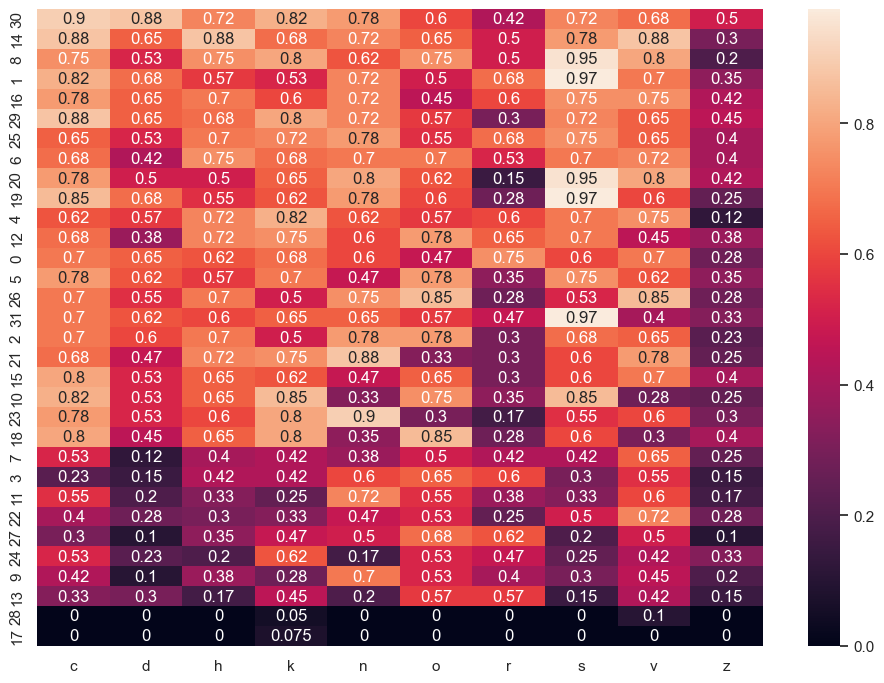

In [134]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(alphadigit_df[[*sloan_letters]], annot=True)

In [135]:
local_df

,Model Name,# Samples,SNR,Frozen Encoder,Checkpoint,c,d,h,k,n,o,r,s,v,z,Average Accuracy
29,wflc_small,200,10.0,True,last,0.900,0.600,0.750,0.850,0.775,0.725,0.350,0.750,0.550,0.575,0.6825
14,wflc_small,200,1000.0,True,best,0.875,0.575,0.700,0.775,0.675,0.425,0.525,0.950,0.875,0.250,0.6625
8,wflc_small,200,1000.0,True,last,0.800,0.675,0.650,0.650,0.700,0.450,0.575,0.875,0.925,0.225,0.6525
1,wflc_small,200,1.0,True,best,0.925,0.675,0.500,0.575,0.700,0.675,0.500,0.950,0.550,0.450,0.6500
30,wflc_small,200,10.0,True,best,0.775,0.650,0.700,0.775,0.750,0.750,0.425,0.650,0.600,0.425,0.6500
25,wflc_small,500,1.0,True,last,0.600,0.600,0.725,0.650,0.825,0.550,0.425,0.825,0.800,0.475,0.6475
26,wflc_small,200,5.0,True,last,0.675,0.675,0.825,0.650,0.775,0.825,0.300,0.700,0.675,0.325,0.6425
2,wflc_small,200,5.0,True,best,0.800,0.625,0.675,0.475,0.625,0.875,0.550,0.675,0.775,0.200,0.6275
31,wflc_small,200,1.0,True,last,0.750,0.525,0.725,0.575,0.575,0.700,0.475,0.950,0.525,0.475,0.6275
4,wflc_tiny,500,1.0,True,best,0.700,0.625,0.725,0.725,0.550,0.575,0.550,0.700,0.700,0.150,0.6000


<Axes: >

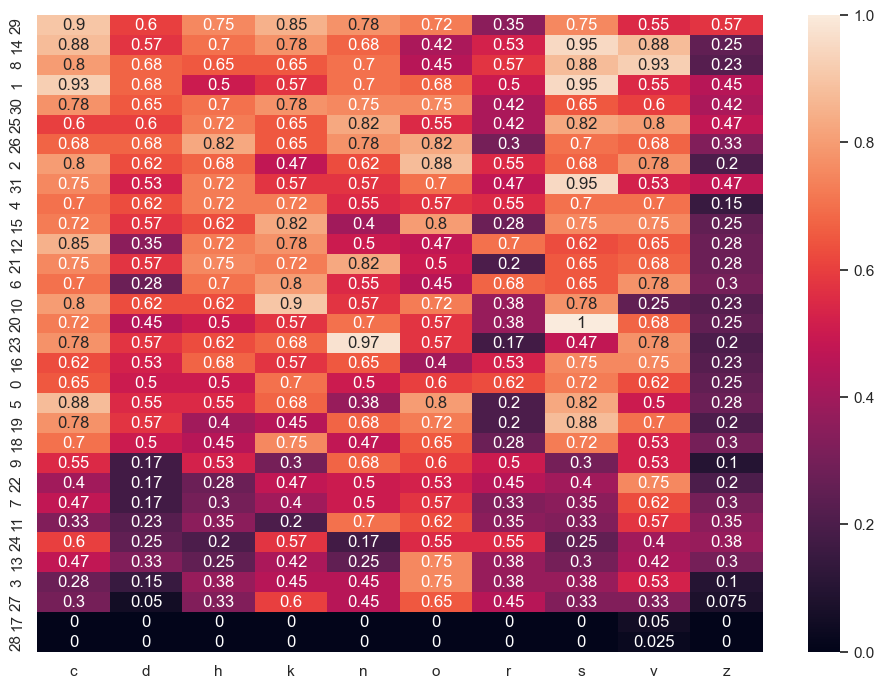

In [136]:
sns.heatmap(local_df[[*sloan_letters]], annot=True)